<a href="https://colab.research.google.com/github/agnesdexavary/Capstone-Project-1/blob/main/Final_Project(Dexavary_Agnes).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CHURN PREDICTION MODEL



**IMPORT THE LIBRARIES**

In [ ]:
#IMPORT THE LIBRARIES....
import numpy as np # linear algebra....
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)....
from matplotlib import pyplot as plt #Visualization of the data....
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import plotly.graph_objs as go
import matplotlib as mpl
import matplotlib.patches as mpatches
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from plotly import tools
from plotly.subplots import make_subplots
from plotly.offline import iplot

   **LOADING THE DATASET**

In [ ]:
df=pd.read_csv("/content/BankChurners.csv")
df.head() #.style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


 **INFO OF THE DATAFRAME**

In [ ]:
#The shape of the dataset.....
df.shape

(10127, 23)

In [ ]:
# Dropping the last two columns and the client number column
df = df.iloc[:,1:-2]

In [ ]:
#The shape of the dataset.....
df.shape

(10127, 20)

In [ ]:
#The dimensions of the dataset.......
df.ndim

2

In [ ]:
#The size of the dataset.......
df.size

202540

In [ ]:
#The columns we have in the dataset.....
df.columns

Index(['Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count',
       'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category',
       'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')

In [ ]:
#The dtypes we have in the dataset.....
df.dtypes

Attrition_Flag               object
Customer_Age                  int64
Gender                       object
Dependent_count               int64
Education_Level              object
Marital_Status               object
Income_Category              object
Card_Category                object
Months_on_book                int64
Total_Relationship_Count      int64
Months_Inactive_12_mon        int64
Contacts_Count_12_mon         int64
Credit_Limit                float64
Total_Revolving_Bal           int64
Avg_Open_To_Buy             float64
Total_Amt_Chng_Q4_Q1        float64
Total_Trans_Amt               int64
Total_Trans_Ct                int64
Total_Ct_Chng_Q4_Q1         float64
Avg_Utilization_Ratio       float64
dtype: object

In [ ]:
#The Information of the Dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

 **CHECKING NAN VALUES**

<Axes: >

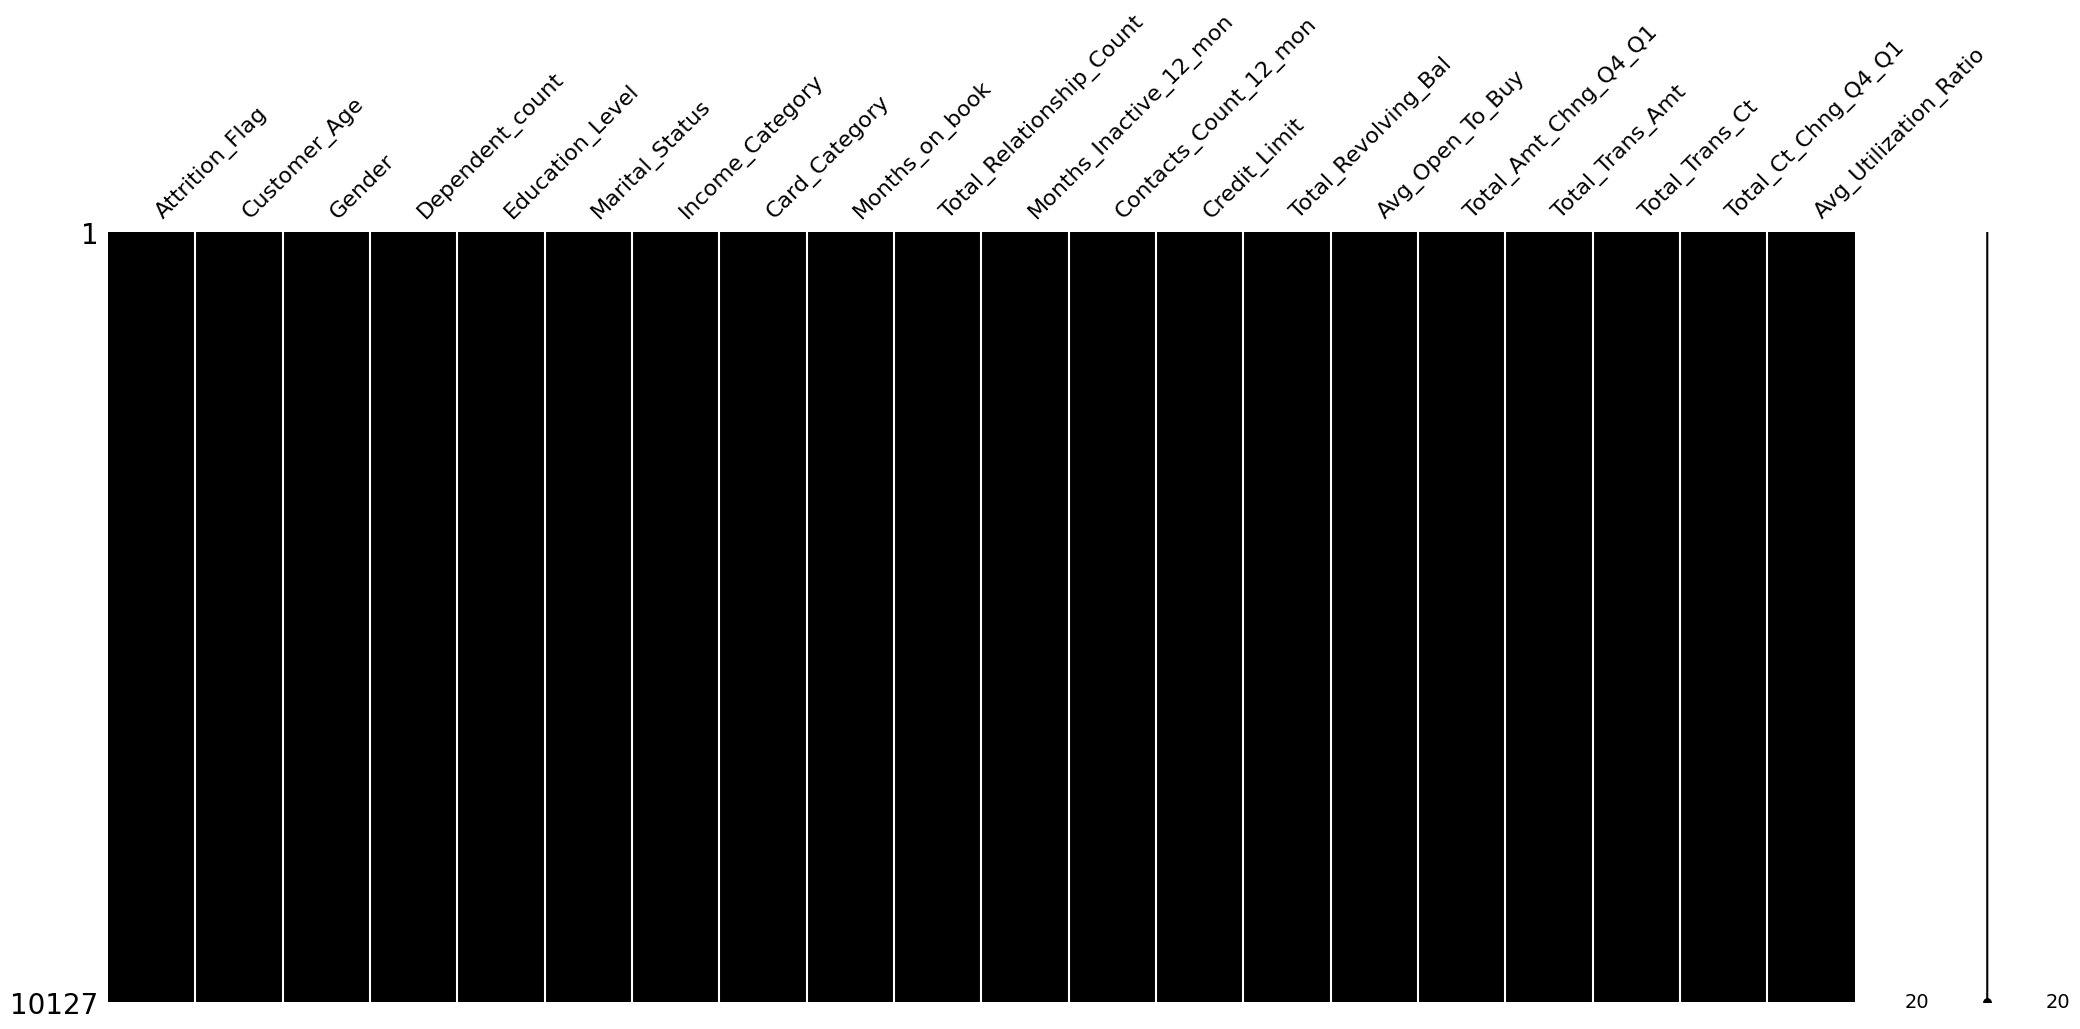

In [ ]:
#Visualizing the missing values
import missingno as mn
mn.matrix(df,color=(0,0,0))

In [ ]:
#PERCENTAGE OF THE MISSING VALUES - DataFrame.....
def missing_data(df):
    total = df.isnull().sum().sort_values(ascending = False)
    Percentage = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
    return pd.concat([total, Percentage], axis=1, keys=['Total', 'Percentage'])
missing_data(df).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Total,Percentage
Attrition_Flag,0,0.000000
Customer_Age,0,0.000000
Total_Ct_Chng_Q4_Q1,0,0.000000
Total_Trans_Ct,0,0.000000
Total_Trans_Amt,0,0.000000
Total_Amt_Chng_Q4_Q1,0,0.000000
Avg_Open_To_Buy,0,0.000000
Total_Revolving_Bal,0,0.000000
Credit_Limit,0,0.000000
Contacts_Count_12_mon,0,0.000000


   **FINDING THE DUPLICATE RECORDS**

In [ ]:
#Finding the duplicates from dataset...
df[df.duplicated()]

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio


   **BASIC STATISTICS**

In [ ]:
# Statistics on Numerical data......
round(df.describe(exclude = 'object'), 2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,46.330000,2.350000,35.930000,3.810000,2.340000,2.460000,8631.950000,1162.810000,7469.140000,0.760000,4404.090000,64.860000,0.710000,0.270000
std,8.020000,1.300000,7.990000,1.550000,1.010000,1.110000,9088.780000,814.990000,9090.690000,0.220000,3397.130000,23.470000,0.240000,0.280000
min,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.630000,2155.500000,45.000000,0.580000,0.020000
50%,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.740000,3899.000000,67.000000,0.700000,0.180000
75%,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.860000,4741.000000,81.000000,0.820000,0.500000
max,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.400000,18484.000000,139.000000,3.710000,1.000000


In [ ]:
# Statistics on Categorical data
round(df.describe(exclude = ['float', 'int64']),2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Attrition_Flag,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
count,10127,10127,10127,10127,10127,10127
unique,2,2,7,4,6,4
top,Existing Customer,F,Graduate,Married,Less than $40K,Blue
freq,8500,5358,3128,4687,3561,9436


In [ ]:
df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000


In [ ]:
# Changing the Attrition_Flag to 0 and 1 (Hidden Input/Output)
df["Attrition_Flag"] = df["Attrition_Flag"].map({"Existing Customer":0, "Attrited Customer":1})

In [ ]:
df.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,0,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,0,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,0,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,0,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000


**DETECTING THE OUTLIERS**

In [ ]:
#Finding the outliers....
continuous_feature = [feature for feature in df.columns if df[feature].dtypes != 'O']
Colors = ['#f03a17']
## Lets analyse the continuous values by creating histograms to understand the distribution
for feature in continuous_feature:
    data=df.copy()
    fig = px.histogram(df, x= feature,title= 'Distribution of '+feature,color_discrete_sequence= Colors)
    fig.show()
    print("Skewness: %f" % df['Attrition_Flag'].skew())
    print("Kurtosis: %f" % df['Attrition_Flag'].kurt())

Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


Skewness: 1.848449
Kurtosis: 1.417043


In [ ]:
# list of numerical variables............
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print('Number of numerical variables: ', len(numerical_features))
print('\n')
print('Numberical Variables Column: ',numerical_features)
print('\n')
# visualise the numerical variables........
df[numerical_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of numerical variables:  15


Numberical Variables Column:  ['Attrition_Flag', 'Customer_Age', 'Dependent_count', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio']




,Attrition_Flag,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,0,45,3,39,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000
1,0,49,5,44,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000
2,0,51,3,36,4,1,0,3418.000000,0,3418.000000,2.594000,1887,20,2.333000,0.000000
3,0,40,4,34,3,4,1,3313.000000,2517,796.000000,1.405000,1171,20,2.333000,0.760000
4,0,40,3,21,5,1,0,4716.000000,0,4716.000000,2.175000,816,28,2.500000,0.000000


**ANALYSIS THE ATTRITION_FLAG**

In [ ]:
from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' +
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>')

In [ ]:
df_nunique = {var: pd.DataFrame(df['Attrition_Flag'].value_counts())
              for var in {'Attrition_Flag'}}
multi_table([ df_nunique['Attrition_Flag'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Attrition_Flag,
0,8500
1,1627


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Attrition_Flag'].value_counts().values.tolist(),
                      x = df['Attrition_Flag'].value_counts().index,
                      text=df['Attrition_Flag'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10500])
iplot(fig)

**ANALYSIS THE CUSTOMER_AGE**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Customer_Age'].value_counts())
              for var in {'Customer_Age'}}
multi_table([ df_nunique['Customer_Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Customer_Age,
44,500
49,495
46,490
45,486
47,479
43,473
48,472
50,452
42,426


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Customer_Age'].value_counts().values.tolist(),
                      x = df['Customer_Age'].value_counts().index,
                      text=df['Customer_Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,650])
iplot(fig)

In [ ]:
df['Age']=0
df.loc[(df['Customer_Age']>25)&(df['Customer_Age']<=35),'Age']=0
df.loc[(df['Customer_Age']>35)&(df['Customer_Age']<=45),'Age']=1
df.loc[(df['Customer_Age']>45)&(df['Customer_Age']<=55),'Age']=2
df.loc[(df['Customer_Age']>55)&(df['Customer_Age']<=65),'Age']=3
df.loc[df['Customer_Age']>65,'Age']=4
df['Age']=df['Age'].astype(int)

In [ ]:
df.drop(['Customer_Age'],axis = 1,inplace = True)

In [ ]:
df_nunique = {var: pd.DataFrame(df['Age'].value_counts())
              for var in {'Age'}}
multi_table([ df_nunique['Age'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Age,
2,4135
1,3742
3,1321
0,919
4,10


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Age'].value_counts().values.tolist(),
                      x = df['Age'].value_counts().index,
                      text=df['Age'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Age", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE DEPENDENT_COUNT**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Dependent_count'].value_counts())
              for var in {'Dependent_count'}}
multi_table([ df_nunique['Dependent_count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Dependent_count,
3,2732
2,2655
1,1838
4,1574
0,904
5,424


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Dependent_count'].value_counts().values.tolist(),
                      x = df['Dependent_count'].value_counts().index,
                      text=df['Dependent_count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3200])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Dependent_count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE MONTHS_ON_BOOK**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Months_on_book'].value_counts())
              for var in {'Months_on_book'}}
multi_table([ df_nunique['Months_on_book'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Months_on_book,
36,2463
37,358
34,353
38,347
39,341
40,333
31,318
35,317
33,305


In [ ]:
fig = make_subplots(rows=1,cols=1)
fig.add_trace(go.Bar(y = df['Months_on_book'].value_counts().values.tolist(),
                      x = df['Months_on_book'].value_counts().index,
                      text=df['Months_on_book'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = 'white',
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2800])
iplot(fig)

   **ANALYSIS THE BANK_RELATIONSHIP_PERIOD**

In [ ]:
df['Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>=0)&(df['Months_on_book']<=10),'Bank_Relationship_Period']=0
df.loc[(df['Months_on_book']>10)&(df['Months_on_book']<=20),'Bank_Relationship_Period']=1
df.loc[(df['Months_on_book']>20)&(df['Months_on_book']<=30),'Bank_Relationship_Period']=2
df.loc[(df['Months_on_book']>30)&(df['Months_on_book']<=40),'Bank_Relationship_Period']=3
df.loc[df['Months_on_book']>50,'Bank_Relationship_Period']=4

In [ ]:
df['Bank_Relationship_Period']=df['Bank_Relationship_Period'].astype(int)

In [ ]:
df.drop(['Months_on_book'],axis = 1,inplace = True)

In [ ]:
df_nunique = {var: pd.DataFrame(df['Bank_Relationship_Period'].value_counts())
              for var in {'Bank_Relationship_Period'}}
multi_table([ df_nunique['Bank_Relationship_Period'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Bank_Relationship_Period,
3,5424
0,2065
2,1837
4,418
1,383


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f']
fig.add_trace(go.Bar(y = df['Bank_Relationship_Period'].value_counts().values.tolist(),
                      x = df['Bank_Relationship_Period'].value_counts().index,
                      text=df['Bank_Relationship_Period'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Bank_Relationship_Period", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE TOTAL_RELATIONSHIP_COUNT**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Total_Relationship_Count'].value_counts())
              for var in {'Total_Relationship_Count'}}
multi_table([ df_nunique['Total_Relationship_Count'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Total_Relationship_Count,
3,2305
4,1912
5,1891
6,1866
2,1243
1,910


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Total_Relationship_Count'].value_counts().values.tolist(),
                      x = df['Total_Relationship_Count'].value_counts().index,
                      text=df['Total_Relationship_Count'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,2500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Relationship_Count", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE MONTHS_INACTIVE_12_MON**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Months_Inactive_12_mon'].value_counts())
              for var in {'Months_Inactive_12_mon'}}
multi_table([ df_nunique['Months_Inactive_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Months_Inactive_12_mon,
3,3846
2,3282
1,2233
4,435
5,178
6,124
0,29


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Months_Inactive_12_mon'].value_counts().values.tolist(),
                      x = df['Months_Inactive_12_mon'].value_counts().index,
                      text=df['Months_Inactive_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Months_Inactive_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE CONTACTS_COUNT_12_MON**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Contacts_Count_12_mon'].value_counts())
              for var in {'Contacts_Count_12_mon'}}
multi_table([ df_nunique['Contacts_Count_12_mon'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


,count
Contacts_Count_12_mon,
3,3380
2,3227
1,1499
4,1392
0,399
5,176
6,54


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Contacts_Count_12_mon'].value_counts().values.tolist(),
                      x = df['Contacts_Count_12_mon'].value_counts().index,
                      text=df['Contacts_Count_12_mon'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Contacts_Count_12_mon", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE CREDIT_LIMIT**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Credit_Limit']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])

iplot(fig)

In [ ]:
fig = px.histogram(df, x="Credit_Limit")
fig.show()

In [ ]:
fig = px.histogram(df, x="Credit_Limit", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE TOTAL_REVOLVING_BAL**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Revolving_Bal']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3500])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Revolving_Bal")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Revolving_Bal", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

**ANALYSIS THE AVG_OPEN_TO_BUY**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Open_To_Buy']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,40000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Avg_Open_To_Buy")
fig.show()

In [ ]:
fig = px.histogram(df, x="Avg_Open_To_Buy", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE TOTAL_AMT_CHNG_Q4_Q1**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Amt_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Amt_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE TOTAL_TRANS_AMT**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Amt']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,20000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Trans_Amt")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Amt", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

**ANALYSIS THE TOTAL_TRANS_CT**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Trans_Ct']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,150])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Trans_Ct")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Trans_Ct", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE TOTAL_CT_CHNG_Q4_Q1**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Total_Ct_Chng_Q4_Q1']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,6])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1")
fig.show()

In [ ]:
fig = px.histogram(df, x="Total_Ct_Chng_Q4_Q1", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE AVG_UTILIZATION_RATIO**

In [ ]:
fig = make_subplots(rows=1,cols=1)

fig.add_trace(go.Box(y=df['Avg_Utilization_Ratio']
      , name="Precompiled Quartiles"))

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,3])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Avg_Utilization_Ratio")
fig.show()

In [ ]:
fig = px.histogram(df, x="Avg_Utilization_Ratio", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

 **EDA & VISUALIZATION ON CATEGORICAL ANALYSIS**

In [ ]:
# list of categorical variables............
cat_features = [feature for feature in df.columns if df[feature].dtypes == 'O']

print('Number of categorical variables: ', len(cat_features))
print("\n")
print('Categorical variables column name:',cat_features)
print("\n")
# visualise the numerical variables........
df[cat_features].head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

Number of categorical variables:  5


Categorical variables column name: ['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category']




,Gender,Education_Level,Marital_Status,Income_Category,Card_Category
0,M,High School,Married,$60K - $80K,Blue
1,F,Graduate,Single,Less than $40K,Blue
2,M,Graduate,Married,$80K - $120K,Blue
3,F,High School,Unknown,Less than $40K,Blue
4,M,Uneducated,Married,$60K - $80K,Blue


 **ANALYSIS THE GENDER**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Gender'].value_counts())
              for var in {'Gender'}}
multi_table([ df_nunique['Gender'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


,count
Gender,
F,5358
M,4769


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Gender'].value_counts().values.tolist(),
                      x = df['Gender'].value_counts().index,
                      text=df['Gender'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,8000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Gender", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})


fig.update_layout(bargap=0.2)

fig.show()

   **ANALYSIS THE EDUCATION_LEVEL**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Education_Level'].value_counts())
              for var in {'Education_Level'}}
multi_table([ df_nunique['Education_Level'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


,count
Education_Level,
Graduate,3128
High School,2013
Unknown,1519
Uneducated,1487
College,1013
Post-Graduate,516
Doctorate,451


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Education_Level'].value_counts().values.tolist(),
                      x = df['Education_Level'].value_counts().index,
                      text=df['Education_Level'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Education_Level", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE MARITAL_STATUS**

In [ ]:
 df_nunique = {var: pd.DataFrame(df['Marital_Status'].value_counts())
              for var in {'Marital_Status'}}
multi_table([ df_nunique['Marital_Status'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])

,count
Marital_Status,
Married,4687
Single,3943
Unknown,749
Divorced,748


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Marital_Status'].value_counts().values.tolist(),
                      x = df['Marital_Status'].value_counts().index,
                      text=df['Marital_Status'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,5000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Marital_Status", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

  **ANALYSIS THE INCOME_CATEGORY**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Income_Category'].value_counts())
              for var in {'Income_Category'}}
multi_table([ df_nunique['Income_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


,count
Income_Category,
Less than $40K,3561
$40K - $60K,1790
$80K - $120K,1535
$60K - $80K,1402
Unknown,1112
$120K +,727


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Income_Category'].value_counts().values.tolist(),
                      x = df['Income_Category'].value_counts().index,
                      text=df['Income_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,4000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Income_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

 **ANALYSIS THE CARD_CATEGORY**

In [ ]:
df_nunique = {var: pd.DataFrame(df['Card_Category'].value_counts())
              for var in {'Card_Category'}}
multi_table([ df_nunique['Card_Category'].style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})])


,count
Card_Category,
Blue,9436
Silver,555
Gold,116
Platinum,20


In [ ]:
fig = make_subplots(rows=1,cols=1)
Colors = ['#0078d7','#16c60c','#f03a17','#00f8d7','#f0f87f','#f0595c']
fig.add_trace(go.Bar(y = df['Card_Category'].value_counts().values.tolist(),
                      x = df['Card_Category'].value_counts().index,
                      text=df['Card_Category'].value_counts().values.tolist(),
              textfont=dict(size=15),
                      textposition = 'outside',
                      showlegend=False,
              marker = dict(color = Colors,
                            line_color = 'black',
                            line_width=3)),row = 1,col = 1)

fig.update_layout(title={'y':0.9,
                         'x':0.5,
                         'xanchor': 'center',
                         'yanchor': 'top'},
                  template='plotly_white')
fig.update_yaxes(range=[0,10000])
iplot(fig)

In [ ]:
fig = px.histogram(df, x="Card_Category", color ="Attrition_Flag", pattern_shape="Attrition_Flag",
                   template='plotly_white', barmode='group',color_discrete_sequence={
                0: "#f0f87f",
                1: "#4696f9"})

fig.update_layout(bargap=0.2)

fig.show()

   **ENCODING THE CATEGORICAL FEATURES**


In [ ]:
#Now one hot encoding
df_new=pd.get_dummies(df, columns=['Gender', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category'],drop_first=False)
print(df_new.shape)

(10127, 38)


In [ ]:
df_new.columns

Index(['Attrition_Flag', 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Pla

In [ ]:
#Rearrangement of the columns......
df = df_new[[ 'Dependent_count', 'Total_Relationship_Count',
       'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit',
       'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1',
       'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1',
       'Avg_Utilization_Ratio', 'Age', 'Bank_Relationship_Period', 'Gender_F',
       'Gender_M', 'Education_Level_College', 'Education_Level_Doctorate',
       'Education_Level_Graduate', 'Education_Level_High School',
       'Education_Level_Post-Graduate', 'Education_Level_Uneducated',
       'Education_Level_Unknown', 'Marital_Status_Divorced',
       'Marital_Status_Married', 'Marital_Status_Single',
       'Marital_Status_Unknown', 'Income_Category_$120K +',
       'Income_Category_$40K - $60K', 'Income_Category_$60K - $80K',
       'Income_Category_$80K - $120K', 'Income_Category_Less than $40K',
       'Income_Category_Unknown', 'Card_Category_Blue', 'Card_Category_Gold',
       'Card_Category_Platinum', 'Card_Category_Silver','Attrition_Flag']]
df.head(2).style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age,Bank_Relationship_Period,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver,Attrition_Flag
0,3,5,1,3,12691.000000,777,11914.000000,1.335000,1144,42,1.625000,0.061000,1,3,False,True,False,False,False,True,False,False,False,False,True,False,False,False,False,True,False,False,False,True,False,False,False,0
1,5,6,1,2,8256.000000,864,7392.000000,1.541000,1291,33,3.714000,0.105000,2,0,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,True,False,True,False,False,False,0


 **SCALING THE DATASET**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit_transform(df.drop('Attrition_Flag',axis=1))
scaled_features = scaler.transform(df.drop('Attrition_Flag',axis=1))

In [ ]:
scaled_features = pd.DataFrame(scaled_features, columns = df.columns[:-1])
scaled_features.head().style.set_properties(**{"background-color": "black","color": "white", "border-color": "black","font-size":"11.5pt",'width': 200})

,Dependent_count,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Age,Bank_Relationship_Period,Gender_F,Gender_M,Education_Level_College,Education_Level_Doctorate,Education_Level_Graduate,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Income_Category_$120K +,Income_Category_$40K - $60K,Income_Category_$60K - $80K,Income_Category_$80K - $120K,Income_Category_Less than $40K,Income_Category_Unknown,Card_Category_Blue,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0.600000,0.800000,0.166667,0.500000,0.340190,0.308701,0.345116,0.392994,0.035273,0.248062,0.437534,0.061061,0.250000,0.750000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
1,1.000000,1.000000,0.166667,0.333333,0.206112,0.343266,0.214093,0.453636,0.043452,0.178295,1.000000,0.105105,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
2,0.600000,0.600000,0.166667,0.000000,0.059850,0.000000,0.098948,0.763615,0.076611,0.077519,0.628164,0.000000,0.500000,0.750000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
3,0.800000,0.400000,0.666667,0.166667,0.056676,1.000000,0.022977,0.413600,0.036775,0.077519,0.628164,0.760761,0.250000,0.750000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000
4,0.600000,0.800000,0.166667,0.000000,0.099091,0.000000,0.136557,0.640271,0.017025,0.139535,0.673129,0.000000,0.250000,0.500000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


  **SPLIT THE FEATURES INTO TRAINING & INTO THE TESTING DATASET**

In [ ]:
X = scaled_features
y = df['Attrition_Flag']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.30,random_state = 0)

   **VISUALIZE MODEL SCORE**

In [ ]:
from sklearn.ensemble import RandomForestClassifier ,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier,GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve ,KFold
from sklearn.metrics import roc_curve,accuracy_score,f1_score,auc,confusion_matrix,roc_auc_score
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Check for missing values in y_train
missing_values = y_train.isnull().sum()
if missing_values > 0:
    # Drop rows with missing target values
    y_train.dropna(inplace=True)

# Re-run the cross-validation code
# Your existing code for cross-validation


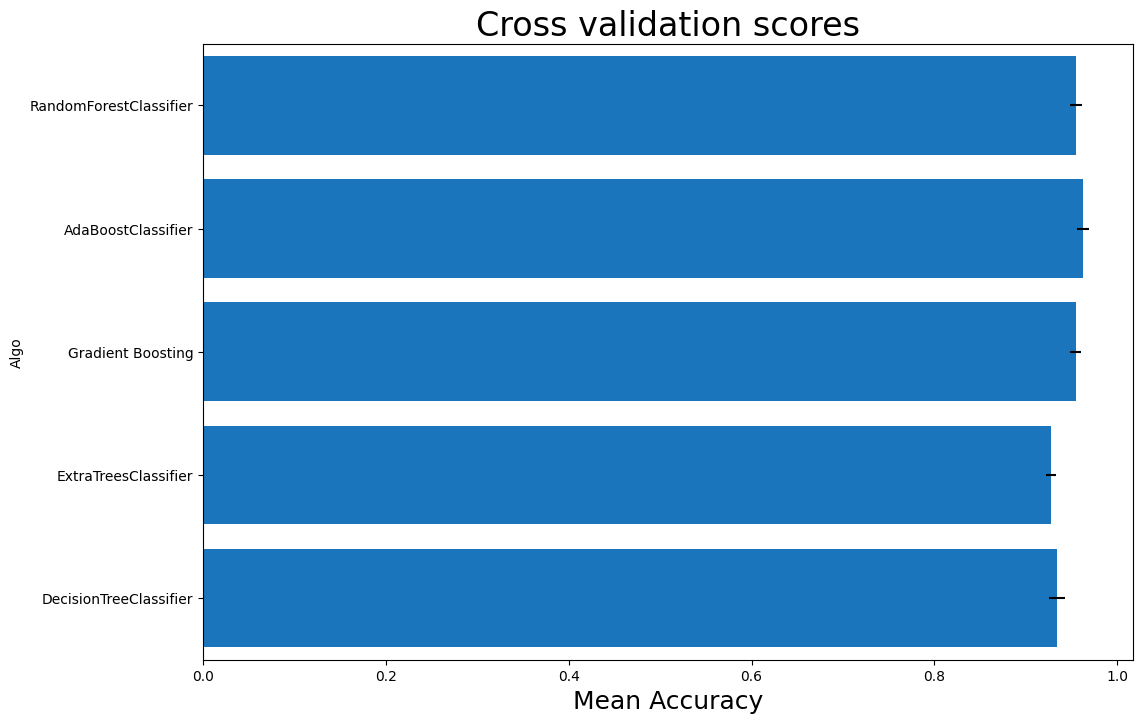

In [ ]:
# =============================================================================
# Cross validation on differnet set of algorithm!!!
# =============================================================================
################################################################
kfold = StratifiedKFold(n_splits=8,shuffle=True, random_state=42)


rs = 15
clrs = []

clrs.append(AdaBoostClassifier(random_state=rs))
clrs.append(GradientBoostingClassifier(random_state=rs))
clrs.append(RandomForestClassifier(random_state=rs))
clrs.append(ExtraTreesClassifier(random_state = rs))
clrs.append(DecisionTreeClassifier(random_state = rs))

cv_results = []
for clr in clrs :
    cv_results.append(cross_val_score(clr, X_train, y_train , scoring = 'accuracy', cv = kfold, n_jobs=-1))

cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())

cv_df = pd.DataFrame({"CrossVal_Score_Means":cv_means,"CrossValerrors": cv_std,"Algo":["RandomForestClassifier","AdaBoostClassifier","Gradient Boosting",'ExtraTreesClassifier','DecisionTreeClassifier']})

# Plot the barplot
plt.figure(figsize = (12,8))
g = sns.barplot(x="CrossVal_Score_Means", y="Algo", data=cv_df, orient="h", xerr=cv_std, color='#0078d7')
g.set_xlabel("Mean Accuracy", fontsize=18)
g.set_title("Cross validation scores", fontsize=24)
plt.show()

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9361632115827575


   **HYPER PARAMETER TUNNING**

In [ ]:
from sklearn.model_selection import GridSearchCV
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [ ]:
dtc = grid_search.best_estimator_
y_pred = dtc.predict(X_test)

In [ ]:
print(accuracy_score(y_test, y_pred))

0.9486673247778875


   **CHECKING THE BEST ESTIMATORS**

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc)

parameters = {
    'n_estimators' : [50, 70, 90, 120, 180, 200],
    'learning_rate' : [0.001, 0.01, 0.1, 1, 10],
    'algorithm' : ['SAMME', 'SAMME.R']
}

grid_search = GridSearchCV(ada, parameters, n_jobs = -1, cv = 10, verbose = 1)
grid_search.fit(X_train, y_train)

Fitting 10 folds for each of 60 candidates, totalling 600 fits


GridSearchCV(cv=10,
             estimator=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                                                max_depth=10,
                                                                                min_samples_leaf=9,
                                                                                min_samples_split=5)),
             n_jobs=-1,
             param_grid={'algorithm': ['SAMME', 'SAMME.R'],
                         'learning_rate': [0.001, 0.01, 0.1, 1, 10],
                         'n_estimators': [50, 70, 90, 120, 180, 200]},
             verbose=1)

In [ ]:
print(grid_search.best_params_)
print(grid_search.best_score_)

{'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 180}
0.9696664355780801


  **TRAIN THE MODEL WITH BEST HYPER PARAMETER**

In [ ]:
ada = AdaBoostClassifier(base_estimator = dtc, algorithm = 'SAMME', learning_rate = 1, n_estimators = 120)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(criterion='entropy',
                                                         max_depth=10,
                                                         min_samples_leaf=9,
                                                         min_samples_split=5),
                   learning_rate=1, n_estimators=120)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2583
           1       0.85      0.80      0.82       456

    accuracy                           0.95      3039
   macro avg       0.91      0.89      0.90      3039
weighted avg       0.95      0.95      0.95      3039



In [ ]:
print(accuracy_score(y_test, y_pred))

0.9486673247778875


   **PLOTING THE CONFUSION MATRIX**

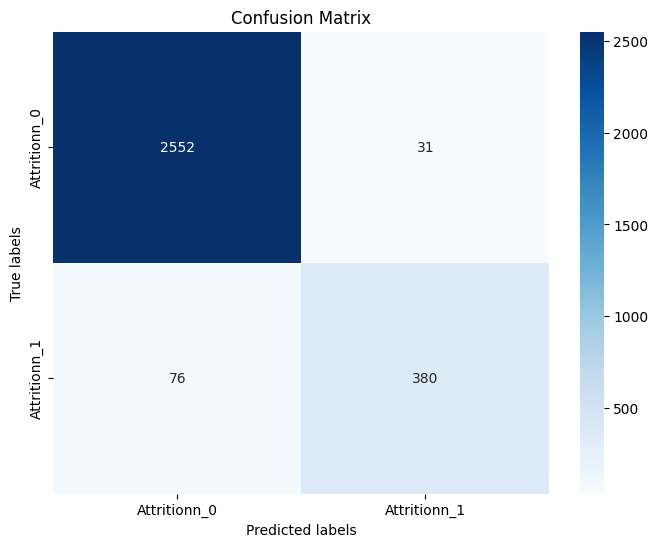

In [ ]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Get the predictions
y_pred = ada.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Attritionn_0', 'Attritionn_1'],
            yticklabels=['Attritionn_0', 'Attritionn_1'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

   **FEATURE IMPORTANCE**

In [ ]:
feature = pd.Series(ada.feature_importances_, index = X_train.columns).sort_values(ascending = False)
print(feature)

Total_Trans_Amt                   0.179633
Total_Amt_Chng_Q4_Q1              0.114760
Total_Trans_Ct                    0.100647
Total_Ct_Chng_Q4_Q1               0.094949
Total_Revolving_Bal               0.067812
Credit_Limit                      0.060512
Total_Relationship_Count          0.055630
Avg_Open_To_Buy                   0.051028
Avg_Utilization_Ratio             0.037698
Months_Inactive_12_mon            0.033388
Contacts_Count_12_mon             0.032752
Dependent_count                   0.028438
Age                               0.024602
Bank_Relationship_Period          0.020733
Marital_Status_Single             0.009203
Marital_Status_Married            0.009036
Income_Category_$80K - $120K      0.006667
Education_Level_Graduate          0.006434
Income_Category_Less than $40K    0.006009
Income_Category_$60K - $80K       0.005881
Education_Level_Uneducated        0.005767
Gender_M                          0.005679
Education_Level_High School       0.005499
Income_Cate

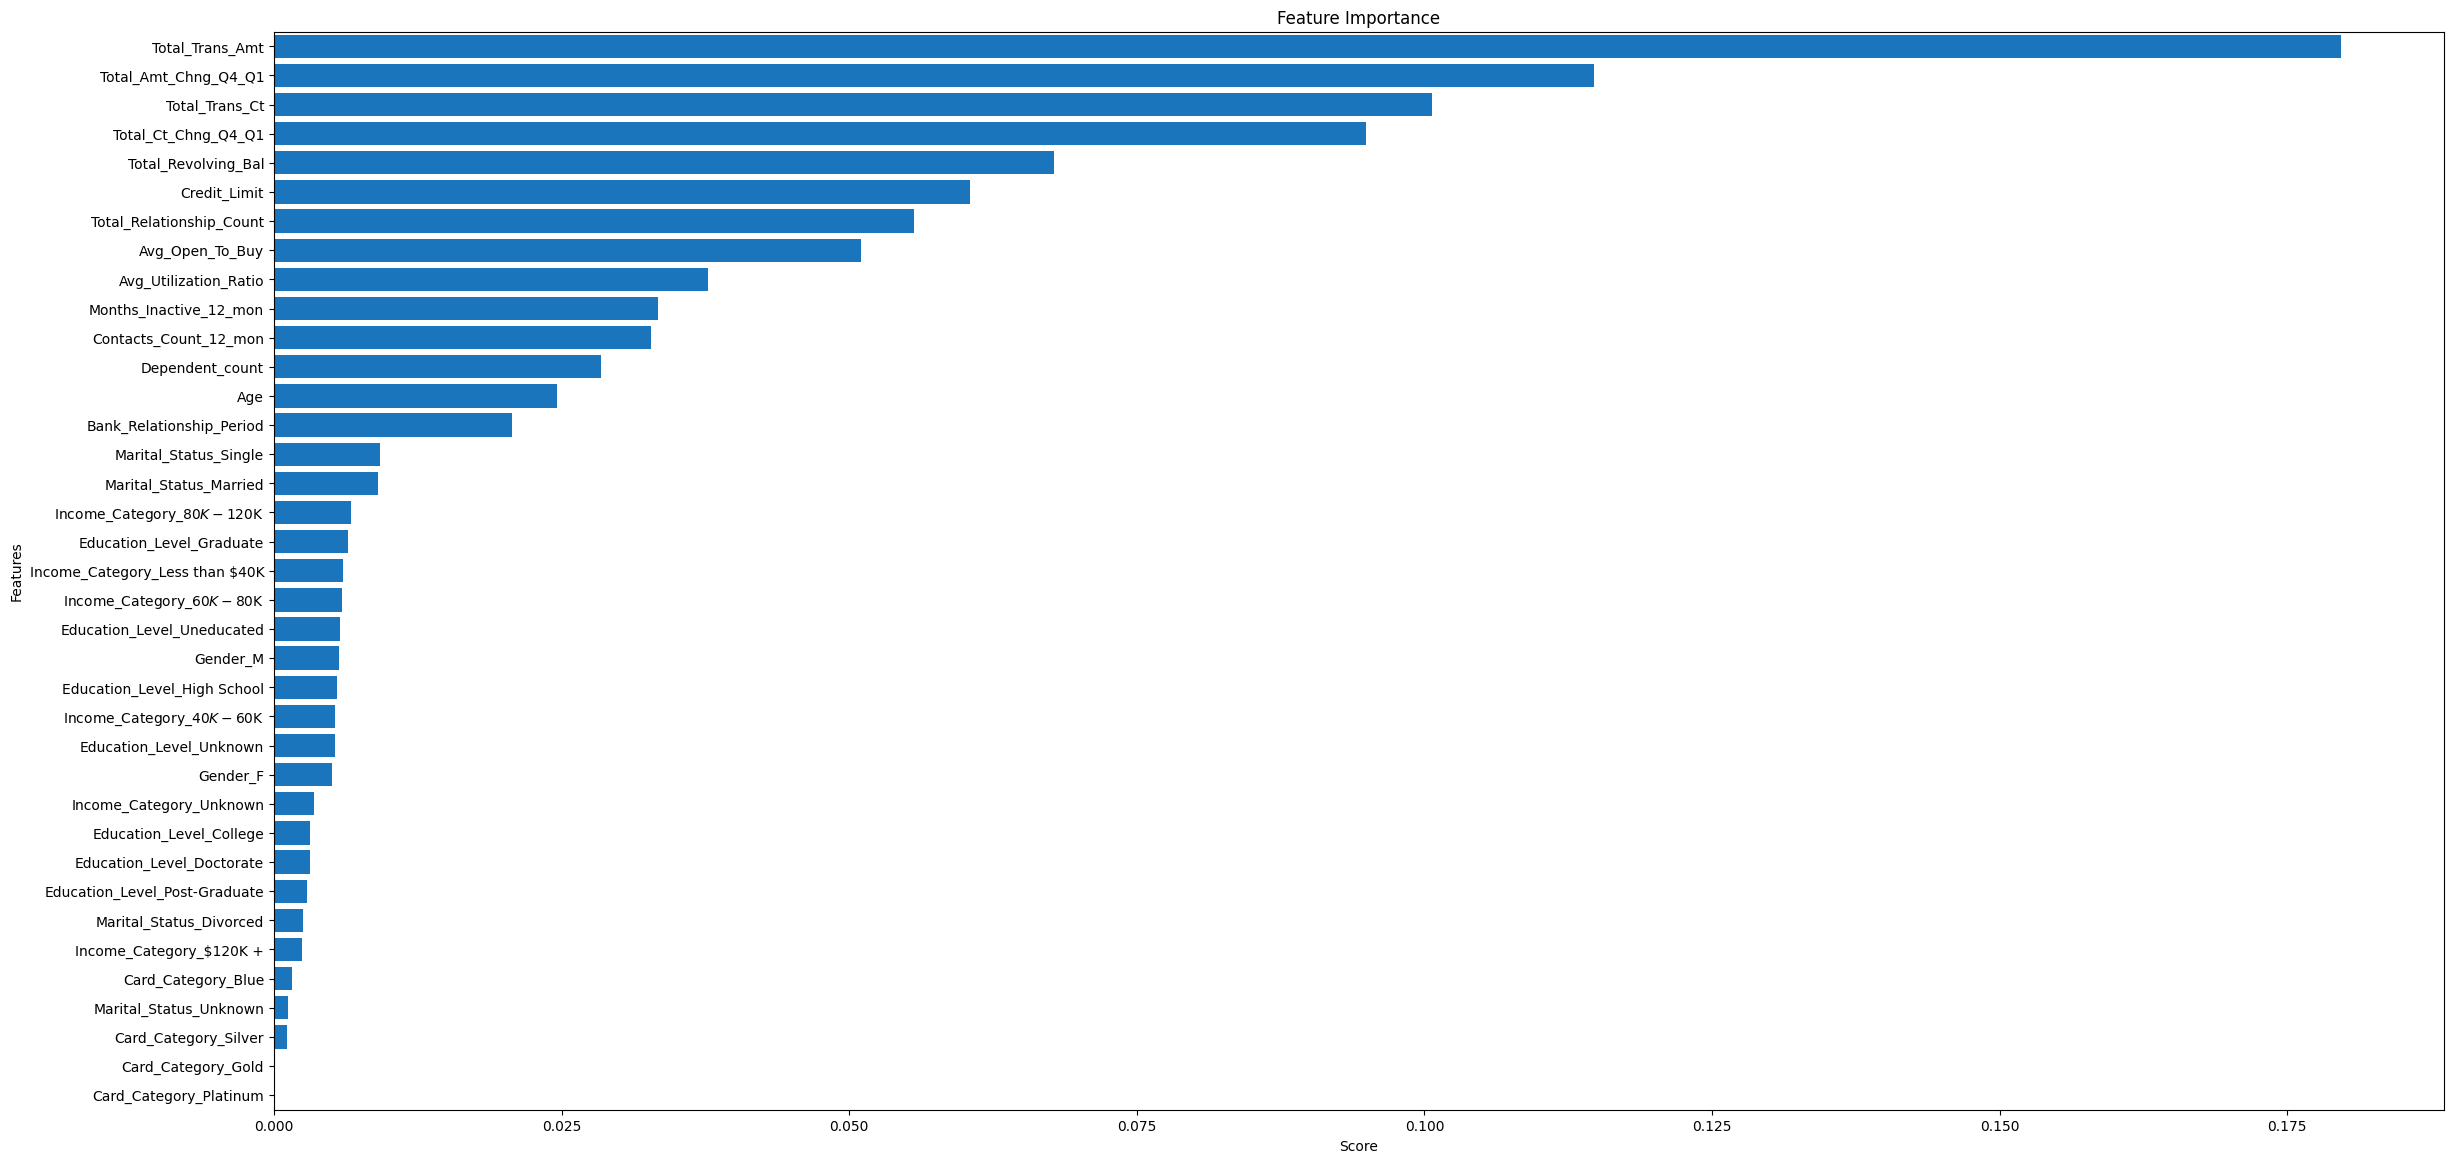

In [ ]:
plt.figure(figsize = (28,14))
sns.barplot(x = feature, y = feature.index,color = '#0078d7')
plt.title("Feature Importance")
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

**conclusion**

There are 16.01% customers churned out. 2.The proportion of gender count is equally distributed (52.9%male and 47.1%female) compare to the proportion of existing and attributed customer count (83.9% and 16.1%) which is highly imbalanced. 3.The proportion of attrited customers by gender there are 14.4% more male than female who have churned. 4.Customers who have churned are highly educated - A high proportion of education level of attrited customer is Graduate level (29.9%), followed by Post-Graduate level (18.8%). 5.A high proportion of marital status of customers who have churned is Married (43.6%), followed by Single (41.1%) compared to Divorced (7.4%) and Unknown (7.9%) status - Marital stuats of the attributed customers are highly clustered in Married status and Single. 6.As you can see from the proportion of income category of attrited customer, it is highly concentrated around 60K-80K income (37.6%), followed by Less than " 40Kincome (16.7 120K + (11.5%)). I assume that customers with higher income doesn't likely to leave their credit card services than meddle-income customer.